This code imports libraries for data manipulation, visualization, and machine learning. Numpy is used for numerical computations and array manipulation. Pandas is used for data manipulation and analysis. Seaborn and matplotlib are used for creating plots and charts. The sklearn library is used for machine learning, including evaluating models and training ensemble models like Isolation Forest.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest

Isolation Forest, also known as iForest, is an unsupervised machine learning algorithm used for anomaly detection. It is an ensemble method that combines multiple decision trees to identify observations that are different from the majority of the data, also known as outliers or anomalies.
The algorithm works by randomly selecting a feature and a random split value and repeatedly splitting the data into subsets, until all the observations are isolated.One of the main advantages of Isolation Forest for fraud detection is its ability to handle high-dimensional data. Credit card transactions, for example, can have a large number of features such as purchase amount, location, time of purchase, etc. Isolation Forest can handle high-dimensional data efficiently and identify abnormal observations regardless of the number of features.

This line of code is using the read_csv function from the pandas library to read in a csv file named 'creditcard.csv' and store it in a variable called 'data'. The read_csv function reads in the csv file and converts it into a pandas dataframe, which is a tabular data structure with rows and columns.

In [2]:
data = pd.read_csv('creditcard.csv')

 This line of code is calling the shape attribute on the 'data' variable, which is a pandas DataFrame. This attribute returns a tuple representing the dimensions of the DataFrame, (number of rows, number of columns). The number of rows represents the number of observations or instances in the data, while the number of columns represents the number of features or variables in the data. data is of shape (284807,31) which implies 284807 cases and 31 columns.

In [3]:
data.shape # Prints the shape of ‘data’ 

(284807, 31)

This data frame is enormous. It costs a lot to compute. As a result, by removing rows, the data frame is downsampled to one-tenth of its original size. Large data samples are required for model training, which improves outcomes but requires more time and computer resources.

In [4]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
492/284315

0.0017304750013189597

this line of code is using the sample() function on the 'data' variable, which is a pandas DataFrame. It is used to randomly sample a fraction of the dataframe.
The sample() function takes a parameter 'frac' which is the fraction of the dataframe that
you want to select. In this case, the value passed is 0.1, so the function will randomly select 10% of the rows from the original dataframe and return a new dataframe with only those rows. This can be useful for reducing the size of the data and working with a smaller subset when the original dataset is too large to work with efficiently. 

In [6]:
#data = data.sample(frac=0.1) # Size of data is reduced

This statement is describing the columns in the 'creditcard.csv' dataset. The dataset contains information about credit card transactions, including the duration of the transaction (column "Time"), the value of the transaction (column "Amount"), and whether or not the transaction was fraudulent (column "Class"). Additionally, there are additional columns labeled "V1" through "V28" which contain reduced transaction information, this information is used to protect users' confidential information.

To achieve this, the dataset uses a technique called Principal Component Analysis (PCA). PCA is a statistical method that is used to reduce the dimensionality of data by identifying patterns in the data and projecting the data onto a lower dimensional space while minimizing information loss. By reducing the dimensionality of the data, PCA makes it possible to protect users' confidential information while preserving the important features of the data that are needed for analysis.

In [7]:
data.columns # Prints columns of data 

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
data.describe() # Displays details of each column

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


This line of code calculates the fraction of outliers (anomalies) in the data. The variable "outlier_fraction" is assigned the result of the calculation.  0 denotes non-fraudulent transaction and 1 denotes fraudulent transaction.

In [9]:
# separating the data for analysis
fraud = data[data['Class'] == 1] # Number of fraudulent transactions
valid = data[data['Class'] == 0] # Number of valid transactions
outlier_fraction = len(fraud)/float(len(valid))

In [10]:
# statistical measures of the data

In [11]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
valid.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [13]:
# compare the values for both transactions
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


<AxesSubplot:>

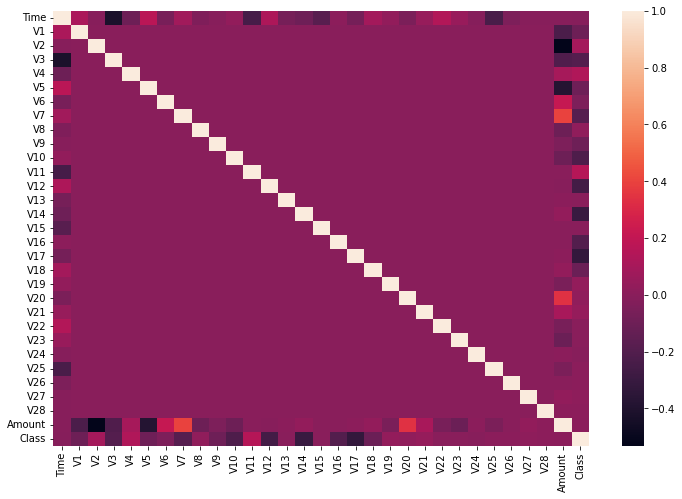

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr()) # Heatmap of correlation between columns of data.

this code is creating two new variables, X and y, for use in machine learning by removing 'Class' column from the original data DataFrame and creating a new DataFrame X, and selecting 'Class' column from the original data DataFrame and creating a new variable y. X will be used as input variable and y will be used as output variable.

In [15]:
X = data.drop('Class',axis = 1) # X is input
y = data['Class'] # y is output

The first line is creating an instance of the IsolationForest class and setting its parameters. The max_samples parameter is set to the number of samples in the input data (X) and the contamination parameter is set to the outlier_fraction calculated earlier. The fit() function is then used to fit the model to the input data (X.values).
The next line uses the predict() function to make predictions on the input data (X.values) using the trained model. The resulting predictions are stored in the variable y_prediction2.

The following two lines of code are used to convert the predictions, which are originally in the form of -1 for anomalous observations and 1 for non-anomalous observations, into 0 and 1 respectively. This is done by replacing all occurrences of -1 in the y_prediction2 variable with 1, and all occurrences of 1 with 0.
The next line calculates the total number of errors in the predictions by comparing y_prediction2 with the true labels (y) and summing the number of instances where they are different.

In [16]:
b = IsolationForest(max_samples = len(X),contamination = outlier_fraction).fit(X.values) # Fitting the model.
y_prediction2 = b.predict(X.values) # Prediction using trained model.
y_prediction2[y_prediction2 == 1] = 0 # Valid transactions are labelled as 0.
y_prediction2[y_prediction2 == -1] = 1 # Fraudulent transactions are labelled as 1.
errors2 = (y_prediction2 != y).sum() # Total number of errors is calculated.
print(errors2)
print(accuracy_score(y_prediction2,y))
print(classification_report(y_prediction2,y))

717
0.9974825056968403
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284314
           1       0.27      0.27      0.27       493

    accuracy                           1.00    284807
   macro avg       0.64      0.64      0.64    284807
weighted avg       1.00      1.00      1.00    284807



the accuracy_score() and classification_report() functions from sklearn.metrics library to evaluate the performance of the model. The accuracy_score() function calculates the accuracy of the predictions, and classification_report() function provides a detailed report of various evaluation metrics such as precision, recall and f1-score

sample cannot be larger than orginal sample

In [17]:
valid_sample = valid.sample(n=2500) #accuracy depends on sample number if it is a small number its f1-score is decreasing 
fraud_sample = fraud.sample(n=490)
outlier_fraction2 = len(fraud_sample)/float((len(valid_sample))) #new fraction accoriding to new data set without this acc is 50
outlier_fraction2

0.196

In [18]:
new_dataset = pd.concat([valid_sample, fraud_sample], axis=0)

In [19]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
28112,34861.0,-0.530563,0.554168,1.399785,1.345180,-0.136712,0.297732,1.232241,-0.108022,-0.074691,...,-0.018308,0.218643,0.131979,0.059563,-0.090878,-0.253535,0.214344,-0.010966,143.50,0
224797,143965.0,-0.442673,1.765596,-0.016810,2.831719,1.097579,0.299475,0.694397,0.398457,-2.367363,...,0.512347,1.285537,0.064302,0.778239,-0.955167,-0.063173,-0.013598,0.193373,6.05,0
212269,138792.0,1.588571,-1.696918,0.335119,0.084981,-2.062318,-0.350620,-1.148426,-0.019831,0.537653,...,0.059177,0.403186,0.136031,0.399681,-0.597850,-0.317762,0.066191,0.026155,229.77,0
22521,32289.0,-0.686470,-0.477711,1.476276,-1.651517,0.065466,-0.104575,-0.286796,0.344369,-0.923468,...,0.151912,0.250200,-0.092994,-0.333497,-0.107280,-0.388544,0.090906,0.107186,15.00,0
1624,1260.0,-2.901810,2.243040,1.240417,-0.493757,-0.416691,2.466447,-2.139862,-4.738845,0.616180,...,5.259325,-1.794220,0.395506,-1.202096,0.396541,0.456621,0.154083,-0.145511,17.74,0


In [20]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93544.15160,0.019966,0.079647,0.023022,0.001326,0.041351,-0.025724,0.010557,-0.026844,0.022011,...,0.002041,-0.001881,0.009775,0.004390,-0.000146,0.003499,-0.022725,-0.007348,-0.001027,78.150444
1,80800.92449,-4.761934,3.615617,-7.014842,4.530689,-3.131266,-1.389829,-5.542449,0.552560,-2.572592,...,0.372333,0.706694,0.012563,-0.038191,-0.107484,0.040588,0.051896,0.170069,0.075111,122.543224


In [21]:
new_dataset['Class'].value_counts()

0    2500
1     490
Name: Class, dtype: int64

In [22]:
X2 = new_dataset.drop('Class',axis = 1) # X is input
y2 = new_dataset['Class'] # y is output

In [23]:
b2 = IsolationForest(max_samples = len(X2),contamination = outlier_fraction2).fit(X2.values) # Fitting the model.
y_prediction3 = b2.predict(X2.values) # Prediction using trained model.
y_prediction3[y_prediction3 == 1] = 0 # Valid transactions are labelled as 0.
y_prediction3[y_prediction3 == -1] = 1 # Fraudulent transactions are labelled as 1.
errors3 = (y_prediction3 != y2).sum() # Total number of errors is calculated.
print(errors3)
print(accuracy_score(y_prediction3,y2))
print(classification_report(y_prediction3,y2))

298
0.9003344481605351
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2404
           1       0.79      0.66      0.72       586

    accuracy                           0.90      2990
   macro avg       0.86      0.81      0.83      2990
weighted avg       0.90      0.90      0.90      2990

